# STRUCTURE:
## - Experiment settings
#### -- Initialise the models
#### -- Fit the AR model
#### -- Fit the non-AR model
#### -- Save the models
## - Experiment results observation
#### --  Compare the models' performance
#### -- Plot the latent $\alpha$s
#### -- Plot the latent $\theta$s
#### -- Plot the latent $\phi$s
#### -- Visualise the init $\beta$s
#### -- Visualise the init $\theta$s
## - Initialisation
#### -- Define parameters
#### -- Generate or load corpus
## - Backlog
#### -- Random $\beta$s
#### -- Plotting $\alpha$s in 3-D
#### -- Load, fit, and dump
#### -- Plot the latent $\alpha$s (2plots)

# EXPERIMENT SETTINGS

### Initialise the models

In [13]:
from dtm_alpha import DTM_Alpha
var_init = 0.1
var_basic = 0.01
var_prop = 0.1
beta = 1./V
clf_ar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                delta_sq=var_prop, autoreg=True)
clf_nonar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                delta_sq=var_prop, autoreg=False)

### Fit the AR model

In [14]:
n_it = 1500
n_it_add = 0
n_burn_it = 0
name_ar = 'corpus_%s|it_%d|ar_%s.pkl' % (name_corpus, n_it, str(True))
name_ar_loaded = 'corpus_%s|it_%d|ar_%s.pkl' % (name_corpus, n_it + n_it_add, str(True))
''' 
Fit
'''
clf_ar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
'''
Load and fit
'''
# clf_ar.load_fit(PATH_OUT_MODEL + name_ar, n_it_add=n_it_add)

DTM_Alpha has started.
Initialisation run-time: 0.03
The burn-in started.
Burn-in finished.
Alpha update run-time: 0.00
Gibbs sampling run-time: 0.25
Iteration: 50
Alpha update rate: 0.45
Iteration: 100
Alpha update rate: 0.45
Iteration: 150
Alpha update rate: 0.45
Iteration: 200
Alpha update rate: 0.46
Iteration: 250
Alpha update rate: 0.46
Iteration: 300
Alpha update rate: 0.45
Iteration: 350
Alpha update rate: 0.45
Iteration: 400
Alpha update rate: 0.45
Iteration: 450
Alpha update rate: 0.45
Iteration: 500
Alpha update rate: 0.45
Iteration: 550
Alpha update rate: 0.45
Iteration: 600
Alpha update rate: 0.45
Iteration: 650
Alpha update rate: 0.45
Iteration: 700
Alpha update rate: 0.45
Iteration: 750
Alpha update rate: 0.45
Iteration: 800
Alpha update rate: 0.45
Iteration: 850
Alpha update rate: 0.45
Iteration: 900
Alpha update rate: 0.45
Iteration: 950
Alpha update rate: 0.45
Iteration: 1000
Alpha update rate: 0.46
Iteration: 1050
Alpha update rate: 0.46
Iteration: 1100
Alpha update r

'\nLoad and fit\n'

### Fit the non-AR model

In [15]:
name_nonar = 'corpus_%s|it_%d|ar_%s.pkl' % (name_corpus, n_it, str(False))
name_nonar_loaded = 'corpus_%s|it_%d|ar_%s.pkl' % (name_corpus, n_it + n_it_add, str(False))
'''
Fit
'''
clf_nonar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
'''
Load and fit
'''
# clf_nonar.load_fit(PATH_OUT_MODEL + name_nonar, n_it_add=n_it_add)

DTM_Alpha has started.
Initialisation run-time: 0.02
The burn-in started.
Burn-in finished.
Alpha update run-time: 0.00
Gibbs sampling run-time: 0.25


AttributeError: 'DTM_Alpha' object has no attribute '_sample_phi'

### Save the models

In [12]:
import os
if not os.path.exists(PATH_OUT_MODEL):
    os.makedirs(PATH_OUT_MODEL)
'''
AR
'''
vars_ar = vars(clf_ar)
pkl.dump(vars_ar, open(PATH_OUT_MODEL + name_ar, 'wb'))
# pkl.dump(vars_ar, open(PATH_OUT_MODEL + name_ar_loaded, 'wb'))
'''
Non-AR
'''
vars_nonar = vars(clf_nonar)
pkl.dump(vars_nonar, open(PATH_OUT_MODEL + name_nonar, 'wb'))
# pkl.dump(vars_nonar, open(PATH_OUT_MODEL + name_nonar_loaded, 'wb'))

# EXPERIMENT RESULTS' OBSERVATION

### Compare the models' performance

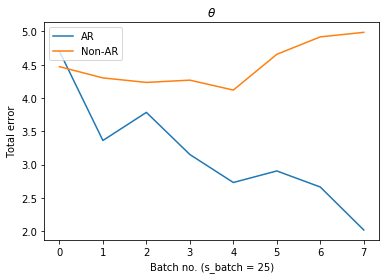

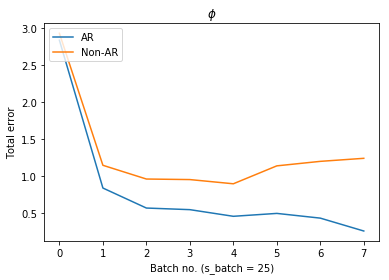

In [10]:
s_batch = 25
performance_ar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init,
                                                         theta_init=theta_init, clf=clf_ar, s_batch=s_batch)
performance_nonar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init, 
                                                            theta_init=theta_init, clf=clf_nonar, s_batch=s_batch)

visualiser_corpus.compare_performances(performance_ar, performance_nonar, s_batch)

### Plot the latent $\alpha$s

In [11]:
alpha_ar = clf_ar.hist_alpha[-1]
visualiser_corpus.plot_latent_alpha(alpha_ar)
alpha_nonar = clf_nonar.hist_alpha[-1]
visualiser_corpus.plot_latent_alpha(alpha_nonar)

TypeError: plot_latent_alpha() missing 1 required positional argument: 'title'

### Plot the latent $\theta$s

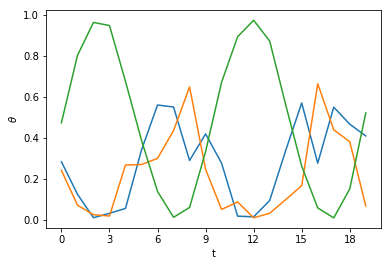

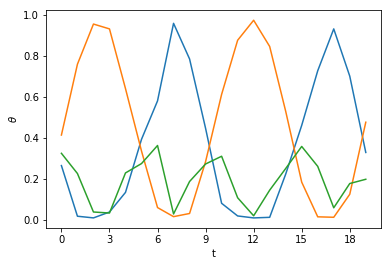

In [12]:
thetas_ar = np.array(clf_ar.hist_theta)
theta_ar_average = np.average(thetas_ar, axis=0)
visualiser_corpus.plot_latent_thetas(theta_ar_average)

thetas_nonar = np.array(clf_nonar.hist_theta)
theta_nonar_average = np.average(thetas_nonar, axis=0)
visualiser_corpus.plot_latent_thetas(theta_nonar_average)

# plt.savefig(PATH_OUT_RESULTS + name_model_out + '.png', dpi=300)

### Plot the latent $\phi$s

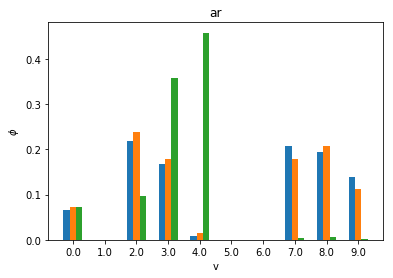

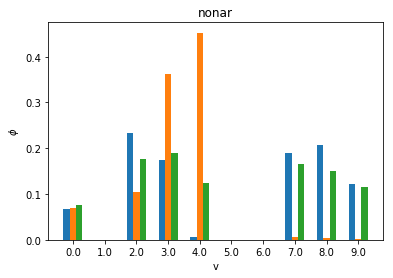

In [13]:
phis_ar = np.array(clf_ar.hist_phi)
phi_ar_average = np.average(phis_ar, axis=0)
visualiser_corpus.plot_latent_phis(phi_ar_average, title='ar')

phis_nonar = np.array(clf_nonar.hist_phi)
phi_nonar_average = np.average(phis_nonar, axis=0)
visualiser_corpus.plot_latent_phis(phi_nonar_average, title='nonar')

### Visualise the init $\beta$s

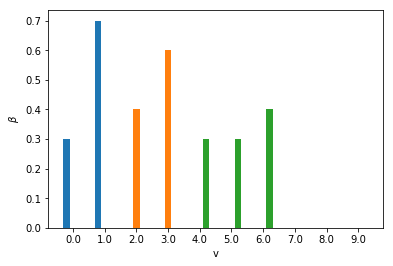

In [5]:
visualiser_corpus.plot_init_betas(beta_init)
# plt.savefig('betas.png')

### Visualise the init $\theta$s

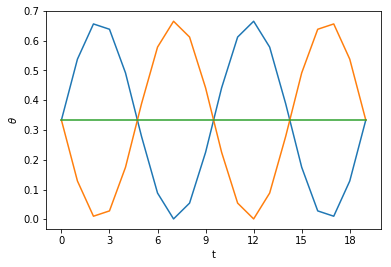

In [6]:
visualiser_corpus.plot_init_thetas(alphas=alpha_init, thetas=theta_init)
# plt.savefig('alphas-init.png')

### Visualise the init $\alpha$s

In [16]:
visualiser_corpus.plot_init_alphas(alpha_init)
# plt.savefig('alphas-init.png')

No alphas used.


# INITIALISATION

### Set the parameters

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import pickle as pkl
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

PATH_HOME = os.path.expanduser('~') + '/Projects/ssmsi/'
PATH_SRC_MODEL = PATH_HOME + 'code/models/'
PATH_SRC_AUXILIARY = PATH_HOME + 'code/pre-processing/'
PATH_DATA = PATH_HOME + 'data/corpora_processed/'
sys.path.append(PATH_SRC_MODEL)
sys.path.append(PATH_SRC_AUXILIARY)

V = 10
vocab = pd.read_pickle(PATH_DATA + 'vocab_synthetic.pkl')

from visualiser_corpus import Visualiser_Corpus
from processor_corpus import Processor_Corpus
from generator_corpus import Generator_Corpus
from helper_experiment import Helper_Experiment

### Choose a corpus

#### experiment-1: {sin,cos}

In [14]:
name_corpus = 'experiment-1'
K = 2
T = 20
xi = 1000

linspace_4pi = np.linspace(0, 4 * np.pi, num=T)
alpha_init = np.zeros((T, K))

alpha_init[:, 0] = np.sin(linspace_4pi)
alpha_init[:, 1] = np.cos(linspace_4pi)
theta_init = None
beta_init = np.array([[0, 0, 0, 0.3, 0.7, 0, 0, 0, 0, 0],
                 [0, 0, 0.2, 0, 0, 0, 0, 0.3, 0.3, 0.2]])

#### experiment-2: = {1/2*sinx+1/2, -1/2*sinx+1/2, 1/2}

In [3]:
name_corpus = 'experiment-2'
K = 3
T = 20
xi = 100

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_4pi = np.linspace(0, 4 * np.pi, num=T)

alpha_init[:, 0] = 1./2 * np.sin(linspace_4pi) + 1/2
alpha_init[:, 1] = -1./2 * np.sin(linspace_4pi) + 1/2
alpha_init[:, 2] = np.linspace(0.5, 0.5, num=T)
theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None
'''
Non-overlapping betas
'''
name_corpus += "|overlapping-no"
beta_init[0, :] = [0.3, 0.7, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.4, 0.6, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0.3, 0.3, 0.4, 0, 0, 0]

### Generate the corpus and initialise the helpers

In [4]:
PATH_OUT_PLOTS = PATH_HOME + 'data/models/{}/plots/'.format(name_corpus)
PATH_OUT_MODEL = PATH_HOME + 'data/models/{}/prefit-models/'.format(name_corpus)
'''
Option 1: Load a corpus
'''
name_corpus_in = 'corpus_{}_nparray.pkl'.format(name_corpus)
corpus_pp = pd.read_pickle(PATH_DATA + name_corpus_in)
'''
Option 2: Generate and pre-process a corpus
'''
# generator_corpus = Generator_Corpus(alpha_init=alpha_init, theta_init=theta_init, beta_init=beta_init, xi=xi, T=T)
# corpus = generator_corpus.generate_corpus()
# processor_corpus = Processor_Corpus(corpus=corpus, vocab=vocab)
# count_max = 100
# normalise = True
# corpus_pp = processor_corpus.process_corpus(threshold=count_max, normalise=normalise)
'''
Initialising the visualisation factory
'''
l_row = 62
l_column = 1.25
n_rows = 8
visualiser_corpus = Visualiser_Corpus(corpus_pp, vocab, n_rows, l_row, l_column, PATH_OUT_PLOTS)
'''
Initialising the experiment helper
'''
helper_experiment = Helper_Experiment()

### Save the corpus

In [4]:
name_corpus_out = 'corpus_{}_nparray.pkl'.format(name_corpus)
corpus_pp.dump(PATH_DATA + name_corpus_out)
vocab = processor_corpus.vocab
# vocab.dump(PATH_DATA + 'vocab_synthetic.pkl')

# BACKLOG

### Random $\beta$s

In [ ]:
## Random Betas
# prior_dirichlet = np.repeat(1./V, V)
# beta = np.random.dirichlet(prior_dirichlet, K)

### Plotting the alphas in 3D

In [74]:
import plotly.plotly as py
from plotly.graph_objs import Surface
import plotly.graph_objs as go

history_alpha = np.array(history_alpha)

alphas_softmax_proposed = np.zeros(shape=history_alpha.shape)
for it, alpha_it in enumerate(history_alpha):
    for t, alpha_proposed_t in enumerate(alpha_it):
        alphas_softmax_proposed[it][t] = softmax(alpha_proposed_t)
    
n_alphas = alphas_softmax_proposed.shape[2]
list_alphas = []
for i in range(n_alphas):
    alpha = dict(z = alphas_softmax_proposed[:, :, i], type='surface')
    list_alphas.append(alpha)
fig = go.Figure(data=list_alphas)

py.iplot(fig)

### Load, fit, and dump

In [32]:
n_it = 1005
n_it_add = 50
var_init = 0.1
var_basic = 0.01
var_prop = 0.1
autoreg = True
name_model_in = 'init_%.0E|basic_%.0E|prop_%.0E|it_%d|autoreg_%s.pkl' \
        % (var_init, var_basic, var_prop, n_it, str(autoreg))
name_model_out = 'init_%.0E|basic_%.0E|prop_%.0E|it_%d|autoreg_%s.pkl' \
        % (var_init, var_basic, var_prop, n_it + n_it_add, str(autoreg))

dtm_alpha = DTM_Alpha()
dtm_alpha.load_fit(PATH_OUT_MODEL + name_model_in, n_it=n_it_add)

# '''
# Plot
# '''
# history_alpha = dtm_alpha.hist_alpha
# alphas_last_proposed = history_alpha[n_it-1]
# alphas_softmax_last_proposed = np.zeros(shape=alphas_last_proposed.shape)
# for t, alphas_last_proposed_t in enumerate(alphas_last_proposed):
#     alphas_softmax_last_proposed[t] = softmax(alphas_last_proposed_t)

# plt.plot(linspace_t, alphas_softmax_last_proposed, linewidth=2)

# '''
# Save the results
# '''
# plt.savefig('results/' + name_model_out + '.png')
# vars_dtm = vars(dtm_alpha)
# with open('models/' + name_model_out + '.pkl', 'wb') as f:
#         pkl.dump(vars_dtm, f)

DTM_Alpha has started.
Iteration: 1050
Alpha update rate: 0.48
DTM_Alpha has finished.


### Plot the latent $\alpha$s (2plots)

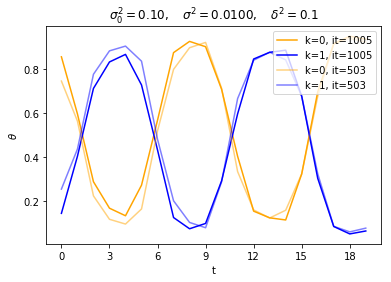

In [25]:
history_alpha = clf_ar.hist_alpha
visualiser_corpus.plot_latent_alpha2(history_alpha, n_it, var_init=var_init,
                                    var_basic=var_basic, var_prop=var_prop)
# plt.savefig(PATH_OUT_RESULTS + name_model_out + '.png', dpi=300)